# 2D Fourier Transform - introduction

<a id='ref'></a>
## References

* Yilmaz, Öz (2001). Seismic Data Analysis: Processing, Inversion, and Interpretation of Seismic Data, 2 ed.: Society of Exploration Geophysicists. ISBN 1-56080-098-4

In [1]:
# Enabling the `widget` backend.
# This requires jupyter-matplotlib a.k.a. ipympl.
# ipympl can be install via pip or conda.
#%matplotlib widget
# aka import ipympl

#%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np
from scipy.fft import fft2, ifft2, fftshift, ifftshift, fftfreq

import my_functions as mfun

<a id='sec1'></a>
## Fourier transform example

In [2]:
# number of samples
M = 100 # along x
N = 200 # along y

In [3]:
# period (in meters)
Tx = 1
Ty = 1

In [4]:
# sampling interval (is meters)
dx = Tx/M
dy = Ty/N
print(dx)
print(dy)

0.01
0.005


In [5]:
# x and y (in meters)
x = np.linspace(0, M*dx, M)
y = np.linspace(0, N*dy, N)
y, x = np.meshgrid(y, x)

In [6]:
x.shape

(100, 200)

In [7]:
x[:5,:5]

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.01010101, 0.01010101, 0.01010101, 0.01010101, 0.01010101],
       [0.02020202, 0.02020202, 0.02020202, 0.02020202, 0.02020202],
       [0.03030303, 0.03030303, 0.03030303, 0.03030303, 0.03030303],
       [0.04040404, 0.04040404, 0.04040404, 0.04040404, 0.04040404]])

In [8]:
y.shape

(100, 200)

In [9]:
y[:5,:5]

array([[0.        , 0.00502513, 0.01005025, 0.01507538, 0.0201005 ],
       [0.        , 0.00502513, 0.01005025, 0.01507538, 0.0201005 ],
       [0.        , 0.00502513, 0.01005025, 0.01507538, 0.0201005 ],
       [0.        , 0.00502513, 0.01005025, 0.01507538, 0.0201005 ],
       [0.        , 0.00502513, 0.01005025, 0.01507538, 0.0201005 ]])

In [10]:
# auxiliary function to create our synthetic signal
def synthetic_signal_2d(A, u, v, x, y):
    assert x.shape == y.shape, 'x and y must have the same shape'
    assert len(A) == len(u) == len(v), 'A, u and v must have the same length'
    signal = np.zeros_like(x)
    for Amn, um, vn in zip(A, u, v):
        # Example with sine
        signal += Amn*np.sin(2*np.pi*(um*x + vn*y))
        # Example with cosine
        #signal += Amn*np.cos(2*np.pi*(um*x + vn*y))
    return signal

In [11]:
# We are gonna to create a signal formed by three components.
# The lists below contain the wavenumbers u and v (in 1/m) and the 
# amplitude A of each component.

# Example of signal depending on y only
# u = [ 0,  0,  0]
# v = [ 2, 10, 30]

# Example of signal depending on x only
# u = [ 2, 10, 30]
# v = [ 0,  0,  0]

# Example of signal depending on x and y
u = [ 2, 10, 30]
v = [ 2, 10, 30]

A = [15, 10,  5]

In [12]:
# This is our synthetic signal
signal = synthetic_signal_2d(A, u, v, x, y)

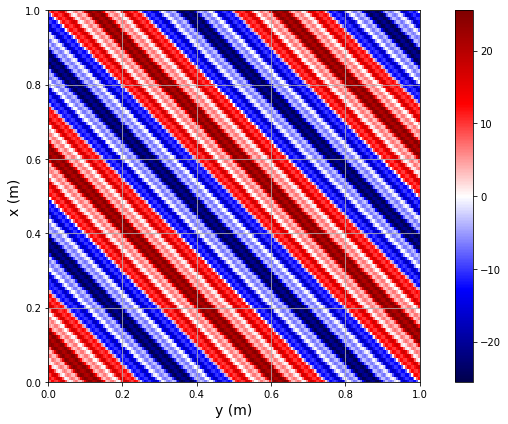

In [13]:
plt.figure(figsize=(10,6))
plt.axis('scaled')
ranges = np.max(np.abs(signal))
plt.pcolormesh(y, x, signal, cmap='seismic', vmin=-ranges, vmax=ranges, shading='auto')
plt.colorbar()
plt.xlabel('y (m)', fontsize=14)
plt.ylabel('x (m)', fontsize=14)
plt.xlim(np.min(y), np.max(y))
plt.ylim(np.min(x), np.max(x))
plt.grid()
plt.tight_layout()
plt.show()

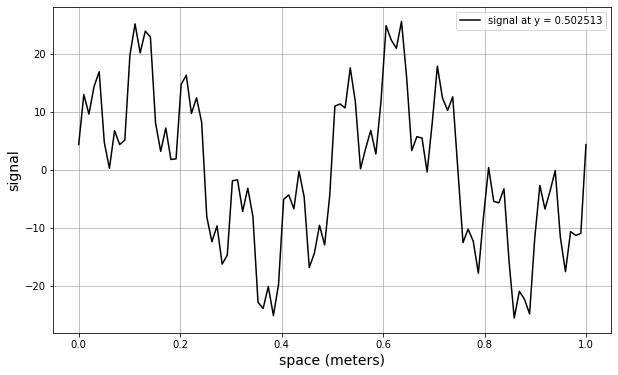

In [14]:
plt.figure(figsize=(10,6))
#plt.plot(y[N//2,:], signal[N//2,:], 'k-', label='signal at x = {:f}'.format(x[y[M//2,N//2]]))
plt.plot(x[:,N//2], signal[:,N//2], 'k-', label='signal at y = {:f}'.format(y[M//2,N//2]))
plt.xlabel('space (meters)', fontsize=14)
plt.ylabel('signal', fontsize=14)
plt.legend(loc='best')
plt.grid()
plt.show()

In [15]:
# Fourier Transform of our signal
FT_signal = fft2(x=signal, norm=None)

In [16]:
# Amplitude spectra of our signal
Amplitude = np.abs(FT_signal)

# For convenience, the amplitude is normalized by its maximum value
Amplitude_max = np.max(Amplitude)

In [17]:
# Frequencies contained in our signal
u_freqs = fftfreq(n=M, d=dx)
v_freqs = fftfreq(n=N, d=dy)

In [18]:
# Minimum and maximum frequency values
print(np.min(u_freqs), np.max(u_freqs))
print(np.min(v_freqs), np.max(v_freqs))

-50.0 49.0
-100.0 99.0


In [19]:
# The maximum absolute frequency is defined by the sampling interval dt 
fnx = 1/(2*dx)
fny = 1/(2*dy)
print(fnx, fny)

50.0 100.0


In [20]:
v_freqs, u_freqs = np.meshgrid(v_freqs, u_freqs)

/home/vanderlei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


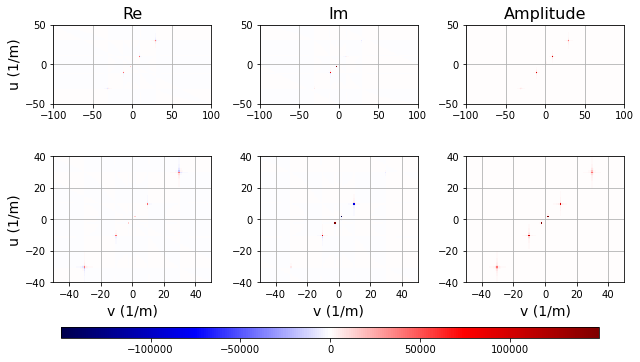

In [21]:
plt.figure(figsize=(9,5))

plt.subplot(2,3,1)
plt.axis('scaled')
plt.title('Re', fontsize=16)
plt.pcolormesh(fftshift(v_freqs), fftshift(u_freqs), fftshift(FT_signal).real, 
               cmap='seismic', vmin = -Amplitude_max, vmax = Amplitude_max,
               shading='auto')
#plt.colorbar()
#plt.xlabel('v (1/m)', fontsize=14)
plt.ylabel('u (1/m)', fontsize=14)
#plt.yticks(ticks=np.arange(-fny, fny+100, 100))
plt.xlim(-fny, fny)
plt.ylim(-fnx, fnx)
plt.grid()

plt.subplot(2,3,2)
plt.axis('scaled')
plt.title('Im', fontsize=16)
plt.pcolormesh(fftshift(v_freqs), fftshift(u_freqs), fftshift(FT_signal).imag, 
               cmap='seismic', vmin = -Amplitude_max, vmax = Amplitude_max,
               shading='auto')
#plt.xlabel('v (1/m)', fontsize=14)
#plt.ylabel('u (1/m)', fontsize=14)
plt.xlim(-fny, fny)
plt.ylim(-fnx, fnx)
plt.grid()

plt.subplot(2,3,3)
plt.axis('scaled')
plt.title('Amplitude', fontsize=16)
plt.pcolormesh(fftshift(v_freqs), fftshift(u_freqs), fftshift(Amplitude),
               cmap='seismic', vmin = -Amplitude_max, vmax = Amplitude_max,
               shading='auto')
#plt.colorbar()
#plt.xlabel('v (1/m)', fontsize=14)
#plt.ylabel('u (1/m)', fontsize=14)
plt.xlim(-fny, fny)
plt.ylim(-fnx, fnx)
plt.grid()

plt.subplot(2,3,4)
plt.axis('scaled')
#plt.title('Re', fontsize=16)
plt.pcolormesh(fftshift(v_freqs), fftshift(u_freqs), fftshift(FT_signal).real, 
               cmap='seismic', vmin = -Amplitude_max, vmax = Amplitude_max,
               shading='auto')
#plt.colorbar()
plt.xlabel('v (1/m)', fontsize=14)
plt.ylabel('u (1/m)', fontsize=14)
plt.xlim(-50, 50)
plt.ylim(-40, 40)
plt.grid()

plt.subplot(2,3,5)
plt.axis('scaled')
#plt.title('Im', fontsize=16)
plt.pcolormesh(fftshift(v_freqs), fftshift(u_freqs), fftshift(FT_signal).imag,
               cmap='seismic', vmin = -Amplitude_max, vmax = Amplitude_max,
               shading='auto')
#plt.colorbar()
plt.xlabel('v (1/m)', fontsize=14)
#plt.ylabel('u (1/m)', fontsize=14)
plt.xlim(-50, 50)
plt.ylim(-40, 40)
plt.grid()

plt.subplot(2,3,6)
plt.axis('scaled')
#plt.title('Amplitude', fontsize=16)
plt.pcolormesh(fftshift(v_freqs), fftshift(u_freqs), fftshift(Amplitude),
               cmap='seismic', vmin = -Amplitude_max, vmax = Amplitude_max,
               shading='auto')
#plt.colorbar()
plt.xlabel('v (1/m)', fontsize=14)
#plt.ylabel('u (1/m)', fontsize=14)
plt.xlim(-50, 50)
plt.ylim(-40, 40)
plt.grid()

#cax = plt.axes([0.93, 0.15, 0.030, 0.85])
cax = plt.axes([0.1, 0.0, 0.83, 0.03])
plt.colorbar(cax=cax, orientation='horizontal')

plt.tight_layout()

plt.show()

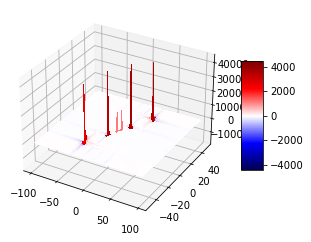

In [22]:
ranges = 0.1*np.max(np.abs([np.min(FT_signal.real), np.max(FT_signal.real)]))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(X=fftshift(v_freqs), Y=fftshift(u_freqs), Z=fftshift(FT_signal).real, 
                       cmap='seismic', vmin = -ranges, vmax = ranges,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()